In [1]:
! pip install fastai

In [0]:

from fastai.text import *
import pandas as pd
import numpy as np



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
dataset = pd.read_csv('/content/drive/My Drive/ULMfit/7_June/cleaned_test_csv_file.csv')

In [7]:
dataset.tail()

,id,cleaned_text
1382,1.245219e+18,Happy Mothers Day you crazy bitch I am sorry c...
1383,1.245882e+18,Mum can not get to the bingo so we brought the...
1384,1.246461e+18,Despite all this bullshit today has been one o...
1385,1.246245e+18,Happy Mothers Day Firstly to my Queen danieles...
1386,1.245178e+18,Mothers Day Walk When you live in a tiny villa...


In [0]:
test = dataset[['id','cleaned_text']]

In [0]:
test.reset_index(drop=True, inplace=True)

In [0]:
train_df = pd.read_csv('/content/drive/My Drive/ULMfit/7_June/clean_train_csv_file.csv')

In [23]:
train_df.head()

,label,cleaned_text
0,0,Happy mothers day mummy Newtownabbey compBCwUS...
1,1,Happy Mothers day to my super Mum Ochie dike N...
2,0,Happy Mothers Day to all the lovely Mums I kno...
3,1,Happy mothers day to our mothers and intending...
4,2,Happy Mothers day to all of our extravagant mo...


In [24]:
from sklearn.model_selection import train_test_split

df_trn, df_val = train_test_split(train_df, stratify = train_df['label'], test_size = 0.05)

df_trn.shape, df_val.shape

((4847, 2), (256, 2))

In [25]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "")

# Classifier model data
data_clas = TextClasDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "", vocab=data_lm.train_ds.vocab, bs=32)

In [26]:

data_clas.show_batch()

text,target
xxbos a xxup very xxup happy xxup mothers xxup day xxup to xxup the xxup most xxup wonderful xxup beautiful xxup loving xxup supportive xxup mum i xxup am xxup blessed xxup and xxup thankful xxup to xxup have xxup you xxup as xxup my xxup mum xxup you xxup are xxup xxunk xxup rock xxup you xxup mean xxup the xxup world xxup and xxup more xxup to xxup,0
xxbos xxmaj good xxmaj morning xxmaj editor i do not know if xxmaj your a xxmaj mumif xxmaj you xxmaj are xxmaj happy xxmaj mothers xxmaj day i xxmaj love xxmaj and xxmaj admire xxmaj you xxmaj editor xxmaj happy xxmaj mothers xxmaj day xxmaj to xxmaj princess xxmaj catherine xxmaj middleton xxmaj your a xxmaj blessing xxmaj to me xxmaj and xxmaj all xxmaj people xxmaj on xxmaj earth,0
xxbos xxmaj today xxmaj is xxmaj mothers xxmaj day xxmaj in xxmaj the xxup uk i xxmaj just xxmaj would xxmaj like xxmaj to xxmaj take xxmaj the xxmaj time xxmaj out xxmaj to xxmaj say xxmaj happy xxmaj mothers xxmaj day xxmaj to xxmaj my xxmaj mom xxup aka xxmaj mama xxmaj lioness xxmaj to xxmaj all xxmaj other xxmaj queens xxmaj out xxmaj there xxmaj who xxmaj are,0
xxbos xxmaj today xxmaj is xxmaj mothers xxmaj day xxmaj in xxmaj the xxup uk i xxmaj just xxmaj would xxmaj like xxmaj to xxmaj take xxmaj the xxmaj time xxmaj out xxmaj to xxmaj say xxmaj happy xxmaj mothers xxmaj day xxmaj to xxmaj my xxmaj mom xxup aka xxmaj mama xxmaj lioness xxmaj to xxmaj all xxmaj other xxmaj queens xxmaj out xxmaj there xxmaj who xxmaj are,0
xxbos xxmaj today xxmaj is xxmaj mothers xxmaj day xxmaj in xxmaj the xxup uk i xxmaj just xxmaj would xxmaj like xxmaj to xxmaj take xxmaj the xxmaj time xxmaj out xxmaj to xxmaj say xxmaj happy xxmaj mothers xxmaj day xxmaj to xxmaj my xxmaj mom xxup aka xxmaj mama xxmaj lioness xxmaj to xxmaj all xxmaj other xxmaj queens xxmaj out xxmaj there xxmaj who xxmaj are,0


In [0]:
data_lm.save('/content/drive/My Drive/ULMfit/7_June/data_lm_export.pkl')
data_clas.save('/content/drive/My Drive/ULMfit/7_June/data_clas_export.pkl')
data_lm = load_data('/content/drive/My Drive/ULMfit/7_June', 'data_lm_export.pkl')
data_clas = load_data('/content/drive/My Drive/ULMfit/7_June', 'data_clas_export.pkl', bs=32)

# Create and train the Language Model

In [28]:

learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.7)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.31E-02
Min loss divided by 10: 7.59E-02


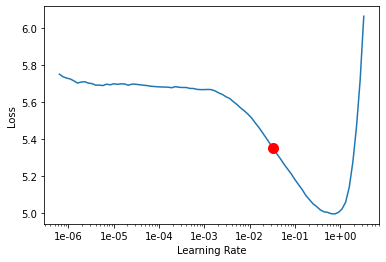

In [29]:
learn.lr_find()
learn.recorder.plot(suggestion=True)
# min_grad_lr = learn.recorder.min_grad_lr

In [30]:
learn.fit_one_cycle(3, 0.067)

epoch,train_loss,valid_loss,accuracy,time
0,4.212419,3.268539,0.378125,00:04
1,3.503923,2.890693,0.433929,00:04
2,3.005632,2.752487,0.452530,00:04


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 2.75E-03


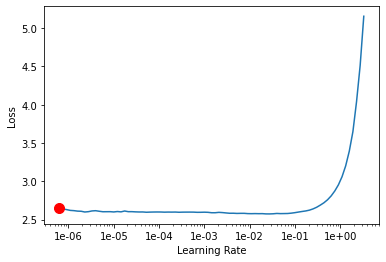

In [31]:

learn.freeze_to(-1)
# learn.fit_one_cycle(5, 1e-1)
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [32]:
learn.fit_one_cycle(3, 1e-06)

epoch,train_loss,valid_loss,accuracy,time
0,2.578511,2.749755,0.453720,00:04
1,2.599363,2.751114,0.450595,00:04
2,2.585082,2.757119,0.452604,00:04


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.79E-04
Min loss divided by 10: 1.10E-03


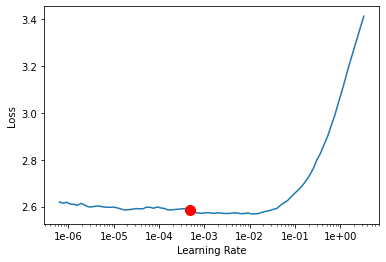

In [33]:

learn.freeze_to(-2)
# learn.fit_one_cycle(5, 1e-1)
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [34]:
learn.fit_one_cycle(3,1e-03)

epoch,train_loss,valid_loss,accuracy,time
0,2.555093,2.678141,0.462202,00:04
1,2.484526,2.626199,0.471726,00:04
2,2.422014,2.613065,0.475372,00:04


In [0]:
learn.save_encoder('/content/drive/My Drive/ULMfit/7_June/ft_enc_unfreezing_last_layer')

In [37]:
learn.predict("Happy mum",n_words=7)

'Happy mum Gave her her 00 roses and'

# Performing Classification

In [0]:
text_classifier_learner??

In [48]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult= 0.5,max_len=256,bptt=32)
learn.load_encoder('/content/drive/My Drive/ULMfit/7_June/ft_enc_unfreezing_last_layer')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (4847 items)
x: TextList
xxbos xxmaj happy xxmaj mothers xxmaj day xxmaj embracing your mother today might mean reaching out to her by video call telephone or popping by to drop off some flowers or some home cooked food to her door xxmaj mothers of the world we salute you pictwittercomqzifmjvu0z,xxbos 00 yrs ago we lost our father life paused everything paused xxmaj dad was not just the breadwinner but the pillar of the house xxmaj but 00 years later i thank xxmaj god everyday for an amazing mother xxmaj she was there through it all xxmaj cried when i cry celebrated my every win xxmaj happy pictwittercom0yplegzag0,xxbos xxmaj happy mothers and mothers day to all of us lesbian and trans mums out there xxmaj hope you are having a brilliant day despite the tough times xxmaj thoughts are with all mums for whom that is not possible at the moment,xxbos mary xxunk xxunk xxunk happy mothers day from your daughters sons in law and grandchildr

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.63E-03
Min loss divided by 10: 2.51E-02


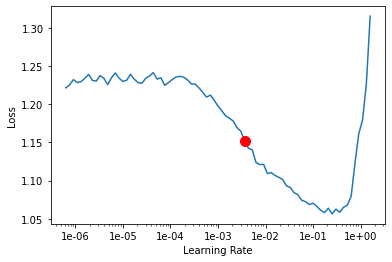

In [49]:

learn.lr_find()
learn.recorder.plot(suggestion=True)
# min_grad_lr = learn.recorder.min_grad_lr

In [50]:
learn.fit_one_cycle(3, 0.0077)

epoch,train_loss,valid_loss,accuracy,time
0,0.867762,1.210071,0.507812,00:03
1,0.817964,0.958618,0.546875,00:03
2,0.784967,0.994008,0.589844,00:03


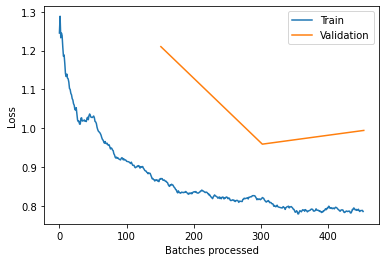

In [51]:

learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.58E-06
Min loss divided by 10: 7.59E-04


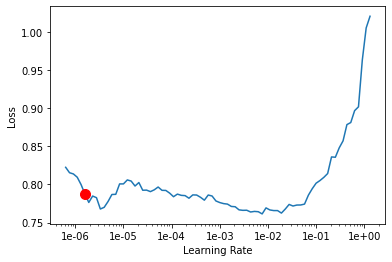

In [52]:

learn.freeze_to(-1)
# learn.fit_one_cycle(5, 1e-1)
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [53]:
learn.fit_one_cycle(3,1e-06)

epoch,train_loss,valid_loss,accuracy,time
0,0.743661,0.974790,0.605469,00:03
1,0.743346,0.951246,0.605469,00:03
2,0.734382,0.950410,0.597656,00:03


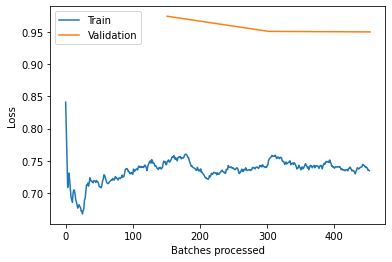

In [54]:

learn.recorder.plot_losses()

In [0]:
learn.save_encoder('/content/drive/My Drive/ULMfit/7_June/classifier_model_with60_percent_acc')

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.58E-06
Min loss divided by 10: 1.91E-05


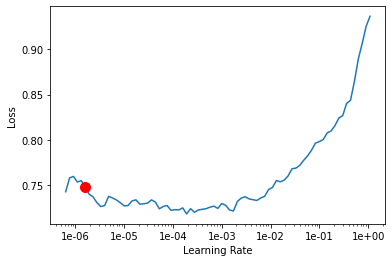

In [56]:

learn.freeze_to(-2)
# learn.fit_one_cycle(5, 1e-1)
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [57]:
learn.fit_one_cycle(3,1e-06, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.759517,0.952610,0.593750,00:04
1,0.745945,0.978209,0.601562,00:04
2,0.734888,0.935893,0.613281,00:04


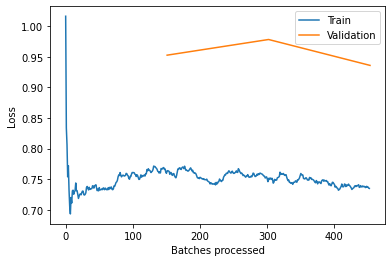

In [58]:

learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.45E-04


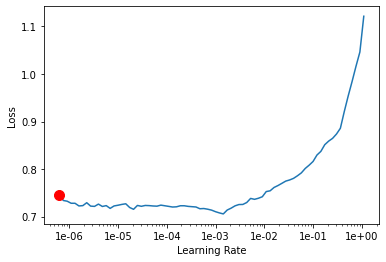

In [59]:

learn.freeze_to(-3)
# learn.fit_one_cycle(5, 1e-1)
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [60]:
learn.fit_one_cycle(3, 1e-06,moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.742255,0.936985,0.613281,00:06
1,0.732695,0.957281,0.593750,00:06
2,0.733627,0.954713,0.609375,00:06


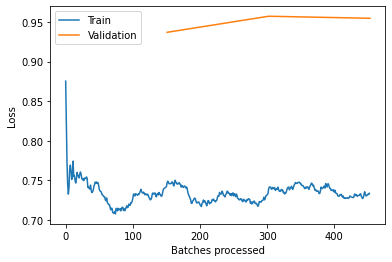

In [61]:

learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-06
Min loss divided by 10: 1.58E-07


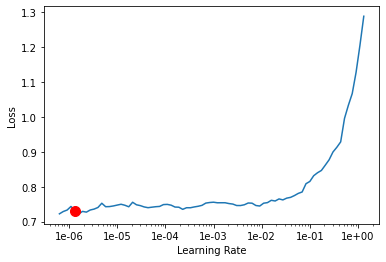

In [62]:

learn.freeze_to(-4)

learn.lr_find()
learn.recorder.plot(suggestion=True)
#learn.fit_one_cycle(5,1e-1)

In [63]:
learn.fit_one_cycle(3,1e-06 )
# learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,time
0,0.726510,0.946357,0.605469,00:08
1,0.725905,0.948117,0.609375,00:07
2,0.760459,0.944403,0.605469,00:08


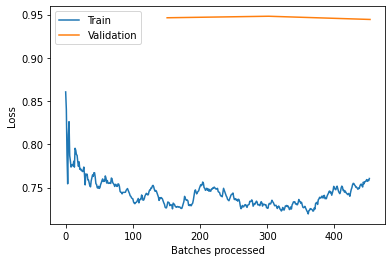

In [64]:
learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.92E-06
Min loss divided by 10: 1.10E-07


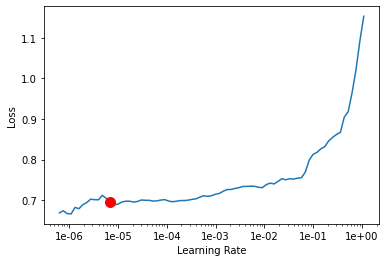

In [65]:

learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [66]:
learn.fit_one_cycle(3, 1e-05)

epoch,train_loss,valid_loss,accuracy,time
0,0.735752,0.928380,0.613281,00:08
1,0.724683,0.945941,0.613281,00:09
2,0.732556,0.951567,0.625000,00:09


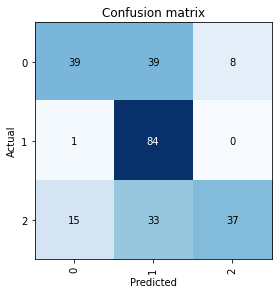

In [67]:
# Plotting confusion matrix 
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
interp.plot_confusion_matrix()

In [68]:
learn.predict('Hello mum Happy mothers day')

(Category tensor(1), tensor(1), tensor([0.1740, 0.6703, 0.1557]))

In [69]:
learn.predict('Hello mum Happy mothers day Hope to see you soooon')

(Category tensor(1), tensor(1), tensor([0.1292, 0.7880, 0.0828]))

In [70]:
learn.predict('sorry mum Happy mothers day')

(Category tensor(1), tensor(1), tensor([0.1529, 0.6410, 0.2060]))

In [0]:
learn.save_encoder('/content/drive/My Drive/ULMfit/7_June/downstream_classifier_model_62_percent_accuracy')

In [73]:
learn.predict('happy mothers day to my mum up in heaven i miss our chats i miss our hugs i miss everything you do miss your voice on the phone your advice on things when i need to talk to you you are in my mind always and my dreams i think of you every single day i love you mum so much ')

(Category tensor(0), tensor(0), tensor([0.4610, 0.1887, 0.3504]))

In [0]:
def label_predict(data):
    p = learn.predict(data)
    return p[1].item()

In [0]:
test['sentiment_class'] = test['cleaned_text'].apply(lambda x : label_predict(x))

In [76]:
test.head()

,id,cleaned_text,sentiment_class
0,1.246628e+18,0 Yeah I once cooked potatoes when I was 0 yea...,1
1,1.245898e+18,Happy Mothers Day to all the mums stepmums gra...,1
2,1.244717e+18,I love the people from the UK however when I a...,1
3,1.245730e+18,Happy 00st Birthday Happy Mothers Day to my mu...,1
4,1.244636e+18,Happy Mothers day to all those wonderful mothe...,1


In [77]:
test['sentiment_class'].value_counts()

1    1338
0      28
2      21
Name: sentiment_class, dtype: int64

In [0]:
test.to_csv('/content/drive/My Drive/ULMfit/7_June/test_file_1.csv')